# Finite Elements in 50 lines

Taken from the Matlab code ([see this link](https://www.particleincell.com/2012/matlab-fem/)).

In [1]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
# Create a square grid
m = 11; n = 11
x = numpy.linspace(0, 1, m); y = numpy.linspace(0, 1, n)
X, Y = numpy.meshgrid(x, y)
p = numpy.vstack((numpy.ravel(X), numpy.ravel(Y))).T # locations of all nodes
triangles = numpy.array([[0, 1, m+1], [0, m+1, m]]) # First two triangles
triangles = numpy.kron(triangles, numpy.ones((m-1, 1), dtype=numpy.int)) + \
    numpy.kron(numpy.ones(triangles.shape, dtype=numpy.int).T, numpy.arange(m-1)).T # Replicate vertically
triangles = numpy.kron(triangles, numpy.ones((n-1, 1), dtype=numpy.int)) + \
    numpy.kron(numpy.ones(triangles.shape, dtype=numpy.int).T, m*numpy.arange(n-1)).T # All triangles
b = numpy.hstack((numpy.arange(m), numpy.arange(m, m*n, m), \
                  numpy.arange(2*m-1, m*n, m), numpy.arange(m*n-m+1, m*n-1))) # Boundary nodes

In [4]:
N = p.shape[0] # Number of nodes
T = triangles.shape[0] # Number of triangles
K = numpy.zeros((N, N)) # Should make this sparse
F = numpy.zeros((N, 1))

In [5]:
# Loop over the triangles; assemble the stiffness matrix and load vector
for nodes in triangles:
    Pe = numpy.hstack((numpy.ones((3, 1)), p[nodes, :]))
    Area = abs(numpy.linalg.det(Pe)) / 2
    C = numpy.linalg.inv(Pe)
    grad = C[1:3, :]
    Ke = Area * numpy.dot(grad.T, grad)
    Fe = Area / 3
    nodes2 = numpy.outer(numpy.ones((3,1), dtype=numpy.int), nodes)
    K[nodes2, nodes2.T] += Ke
    F[nodes] += Fe

In [6]:
# Set Dirichlet boundary conditions
K[b, :] = 0; K[:, b] = 0; F[b] = 0
b2 = numpy.outer(numpy.ones(b.shape, dtype=numpy.int), b)
K[b2, b2.T] = numpy.eye(len(b))

In [7]:
# Solve
U = numpy.linalg.solve(K, F)

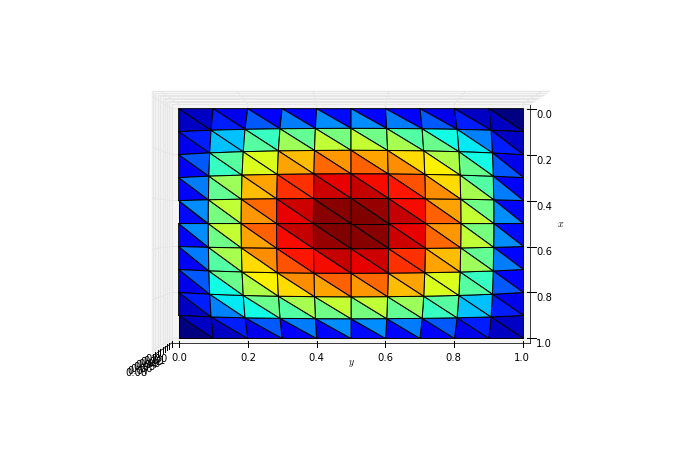

In [8]:
# Plot result
fig=pyplot.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(p[:,0], p[:,1], U[:,0], triangles=triangles, cmap=cm.jet)
ax.view_init(elev=90,azim=0);ax.set_xlabel(r"$x$");ax.set_ylabel(r"$y$");

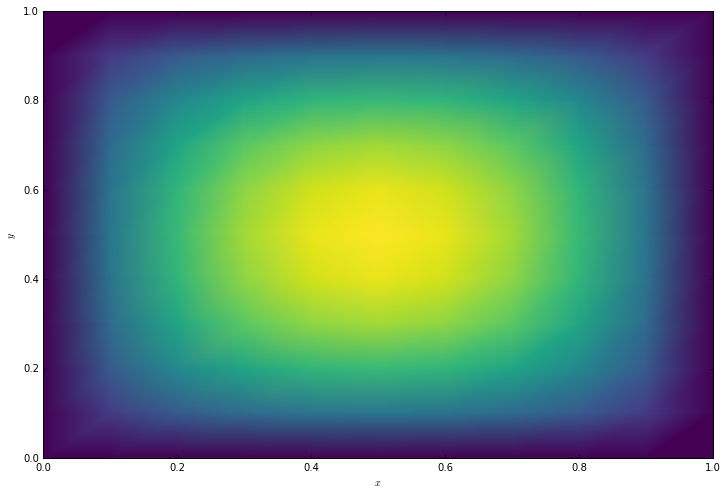

In [9]:
# Plot result
fig=pyplot.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.tripcolor(p[:,0], p[:,1], U[:,0], triangles=triangles, cmap=cm.viridis, shading='gouraud')
ax.set_xlabel(r"$x$");ax.set_ylabel(r"$y$");